In [1]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 473.4 kB/s eta 0:00:001m456.2 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:002.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.4 MB/s eta 0:00:006.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 635.3 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 725.5 kB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 566.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 600.9 kB/s eta 0:00:001m583.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 421.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 514.7 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 692.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 587.2 kB/s eta 0:00:001m823.9 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install numpy pandas seaborn pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 543.2 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [13]:
df = pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df['job']=df['job'].astype('category')
df['job']=df['job'].cat.codes

df['marital']=df['marital'].astype('category')
df['marital']=df['marital'].cat.codes

df['education']=df['education'].astype('category')
df['education']=df['education'].cat.codes

df['default']=df['default'].astype('category')
df['default']=df['default'].cat.codes

df['housing']=df['housing'].astype('category')
df['housing']=df['housing'].cat.codes

df['loan']=df['loan'].astype('category')
df['loan']=df['loan'].cat.codes

df['contact']=df['contact'].astype('category')
df['contact']=df['contact'].cat.codes

df['month']=df['month'].astype('category')
df['month']=df['month'].cat.codes

df['poutcome']=df['poutcome'].astype('category')
df['poutcome']=df['poutcome'].cat.codes

df['y']=df['y'].astype('category')
df['y']=df['y'].cat.codes

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [17]:
X= df.drop(columns='y')
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [18]:
y=df['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [21]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4603,32,1,1,1,0,113,1,1,2,20,8,235,2,-1,0,3
27637,58,2,1,1,0,0,0,1,0,21,9,56,2,-1,0,3
6897,55,1,1,1,0,284,1,1,2,28,8,157,3,-1,0,3
31742,44,10,1,1,0,728,1,0,0,7,0,185,1,328,11,0
8378,32,7,1,1,1,-790,1,0,2,3,6,159,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,57,4,1,2,0,215,0,1,0,23,5,288,9,-1,0,3
8964,56,9,1,1,0,62,0,1,2,5,6,243,1,-1,0,3
5944,30,10,2,2,0,306,0,0,2,26,8,372,14,-1,0,3
5327,28,9,2,2,0,370,1,0,2,23,8,108,5,-1,0,3


In [22]:
y_test

122      0
37697    0
2909     0
33806    0
35563    0
        ..
26052    0
7549     0
33562    0
33879    1
24869    0
Name: y, Length: 13564, dtype: int8

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler= StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.84250744, -1.02327643, -0.27798285, ..., -0.41205091,
        -0.23747307,  0.44486424],
       [ 1.59721051, -0.7176292 , -0.27798285, ..., -0.41205091,
        -0.23747307,  0.44486424],
       [ 1.31570459, -1.02327643, -0.27798285, ..., -0.41205091,
        -0.23747307,  0.44486424],
       ...,
       [-1.03017805,  1.72754859,  1.36791488, ..., -0.41205091,
        -0.23747307,  0.44486424],
       [-1.21784866,  1.42190137,  1.36791488, ..., -0.41205091,
        -0.23747307,  0.44486424],
       [ 1.03419867,  1.42190137, -0.27798285, ..., -0.41205091,
        -0.23747307,  0.44486424]])

In [28]:
lr = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)

In [29]:
lr.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [30]:
lr.score(X_train_scaled,y_train)

0.8904477517616204

In [31]:
lr.score(X_test_scaled,y_test)

0.8942789737540549

In [34]:
accuracy_score = accuracy_score(y_test,lr.predict(X_test_scaled) )
print(f"Accuracy: {accuracy_score:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, lr.predict(X_test_scaled)))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12008
           1       0.60      0.23      0.34      1556

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



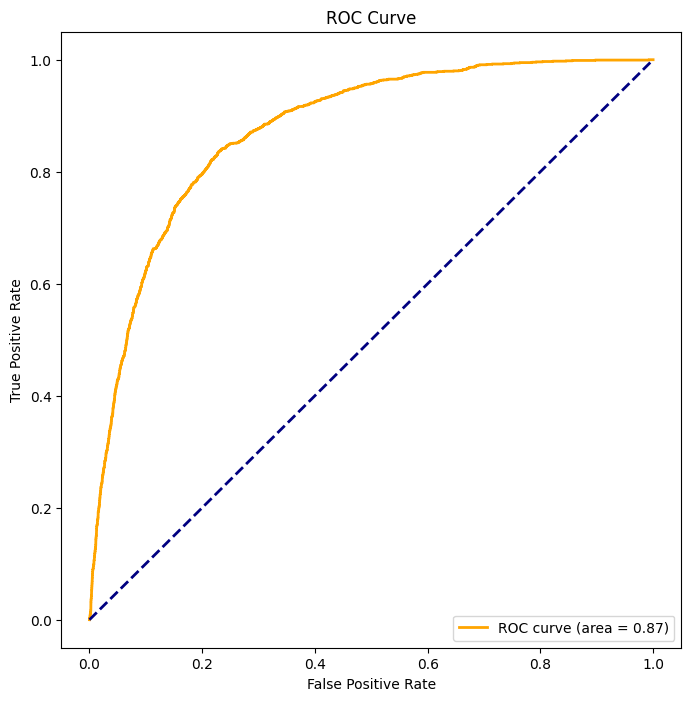

In [35]:
y_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(
    fpr,
    tpr,
    color="orange",
    lw=2,
    label="ROC curve (area = {:.2f})".format(roc_auc),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()